# E2a: Küchentischversuch zum Laval-Rotor

Name:  
Datum:  

## Forschungsfrage

Formulieren Sie eine oder mehrere Forschungsfragen zu der Lerneinheit: Inwiefern kann man mit einem billigen Beschleunigungssensor kleine und grosse Vibrationenmessen und auswerten.

# Erster Versuch
Hier werden Sie den ersten Gegenstand auswerten. Die Auswertung des zweiten Gegenstands kann das analog erfolgen, die entsprechenden jupyter-notebook-Zellen sind weiter unten vorbereitet.

##  Versuchsaufbau und -durchführung

Beachten Sie, dass Sie den Code zum Auslesen des Beschleunigungssensor ausschließlich mit dem Raspberry Pi ausführen können.

- Bild von Aufbau des Haushaltsgegenstands:

<img src="IMG_20240109_131917.jpg" width="500">

- Beschreibung des Aufbaus: Ich habe den Sensor auf die Rückseite meines Handys geklebt, um dann mein Handy zu vibrierenzu lassen. 
- Vorgangsbeschreibung:Die Vibration des handys wurde mithilfe des Sensors auf der Rückseite erfasst.

## Versuchsauswertung

Die Vermessung des Haushaltsgegenstands wird in diesem Notebook ausgewertet, dazu werden die drei Funktionen ```get_vec_accel()```, ```interpolation()``` und ```my_fft()``` in ```functions/m_postprocessing.py``` verwendet. Die Ein- und Ausgangsgrößen der Funktionen sind in ```functions/m_postprocessing.py``` definiert, bitte berücksichtigen Sie die vordefinierten Datentypen.


Alle Codeblöcke, in denen Sie Änderungen vornehmen müssen, sind nachfolgend markiert.

In [32]:
import h5py
import numpy as np
import json
import os

%matplotlib inline
import matplotlib.pyplot as plt

from functions.m_operate import evaluate_metadata

from functions.m_postprocessing import get_vec_accel
from functions.m_postprocessing import interpolation
from functions.m_postprocessing import my_fft

path = os.path.join("supplementary_code", "FST.mplstyle")
plt.style.use(path)

#### 1a. Einlesen der Mess- und Metadaten

In [33]:
"""Parameter definition"""
# -------------------------------------------------------------------------------------------#1-start
# TODO: Adjust the parameters to your needs. Please use relative paths!
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
path_measurement_folder = "measurement_data/data_20240109_133005_OleQuiring_handy" # replace None by the relative path to the first object's folder
h5_file_name = "data_20240109_133005_OleQuiring_handy.h5" # replace None by the filename of the hdf5-file
# ---------------------------------------------------------------------------------------------#1-end

In [34]:
"""Prepare Metadata"""
(setup_json_dict, sensor_settings_dict, probe_name) = evaluate_metadata(
    path_measurement_folder
)

print(json.dumps(setup_json_dict, indent=2, default=str))
print(json.dumps(sensor_settings_dict, indent=2, default=str))
print("Probe: {}".format(probe_name))


{
  "1ee846ef-4df0-632a-bfdb-ef2ea3181b39": {
    "type": "general",
    "name": "general_info",
    "comment": "",
    "path": "measurement_data/data_20240109_133005_OleQuiring_handy/1ee846ef-4df0-632a-bfdb-ef2ea3181b39.json"
  },
  "1ee846f1-b588-6d3c-9659-7c3266d530e8": {
    "type": "instrument",
    "name": "raspberry_pi",
    "comment": "",
    "path": "measurement_data/data_20240109_133005_OleQuiring_handy/1ee846f1-b588-6d3c-9659-7c3266d530e8.json"
  },
  "1ee847be-fddd-6ee4-892a-68c4555b0981": {
    "type": "sensor",
    "name": "accelerometer",
    "range": {
      "min": -2,
      "max": 2,
      "units": "standard_gravity"
    },
    "frequency": {
      "value": 800,
      "units": "Hertz"
    },
    "comment": "",
    "path": "measurement_data/data_20240109_133005_OleQuiring_handy/1ee847be-fddd-6ee4-892a-68c4555b0981.json"
  },
  "1eead63e-ea50-67c3-9bf4-bcf3919ec79d": {
    "type": "probe",
    "name": "handy",
    "comment": "",
    "path": "measurement_data/data_2024010

#### 1b. Auslesen der Beschleunigungen und der Zeit in numpy-arrays

In [35]:
file_path=path_measurement_folder+"/"+h5_file_name
sensorid= list(setup_json_dict)[2]
with h5py.File(file_path, 'r') as file:
    acc_x = np.array(file[sensorid]["acceleration_x"]["value"])
    acc_y  = np.array(file[sensorid]["acceleration_y"]["value"])
    acc_z = np.array(file[sensorid]["acceleration_z"]["value"])
    vec_time = np.array(file[sensorid]["timestamp"]["value"])


#### 2. Betrag der Beschleunigung berechnen

Die Messdaten des Beschleunigungssensors sind vektorielle Werte (```acc_x, acc_y, acc_z```). Berechnen Sie für jeden Zeitpunkt in ```vec_time``` den Betrag des Beschleunigungsvektors. Verwenden Sie dazu die Funktion ```get_vec_accel()```. In den folgenden Aufgaben wird der Betrag der Beschleunigung weiterverwendet.

In [36]:
abs_acc=get_vec_accel(acc_x,acc_y,acc_z)


#### 3. Darstellung der Messdaten
Stellen Sie den Betrag der Beschleunigung über die Zeit und die zeitlichen Abstände zwischen den Messpunkten über die Zeit graphisch dar. Achten Sie dabei auf eine sinnvolle Achsenbeschriftung. 

Text(0, 0.5, 'absolute value of acceleration in m/s^2')

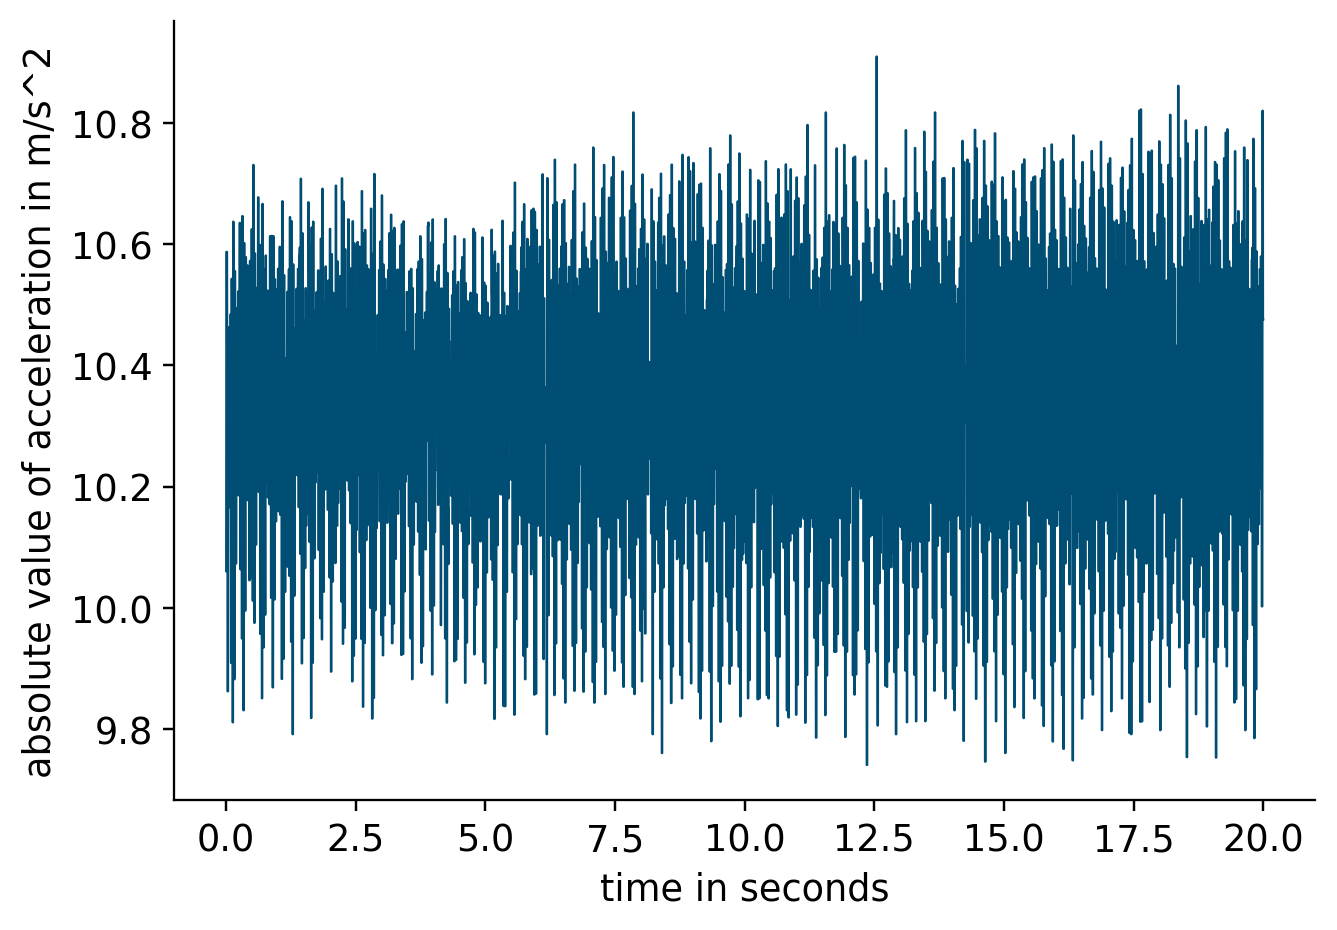

In [37]:
plt.plot(vec_time,abs_acc)
plt.xlabel("time in seconds")
plt.ylabel("absolute value of acceleration in m/s^2")

#### 4. Interpolation der Messwerte

Da es sich beim Pi nicht um ein Echtzeit-Messsystem handelt, variieren die Zeitabstände zwischen den Messwerten. Da für die FFT äquidistante Messwerte benötigt werden, ist eine Interpolation der Daten erforderlich.

In [38]:
# -------------------------------------------------------------------------------------------#4-start
# TODO: Write the function interpolation() (in m_postprocessing) to linearly interpolate the
# acceleration.
[interpolation_points,interpolated_values]=interpolation(vec_time,abs_acc)


#### 5 & 6. FFT durchführen und graphisch darstellen

Transformieren Sie die interpolierten Beträge der Beschleunigung mit der Funktion ```my_fft()``` in den Frequenzraum. Eine Skalierung der Amplitude der FFT ist nicht notwendig.
Stellen Sie die Amplitude des Signals als Funktion der Frequenz graphisch dar.

(0.0, 50.0)

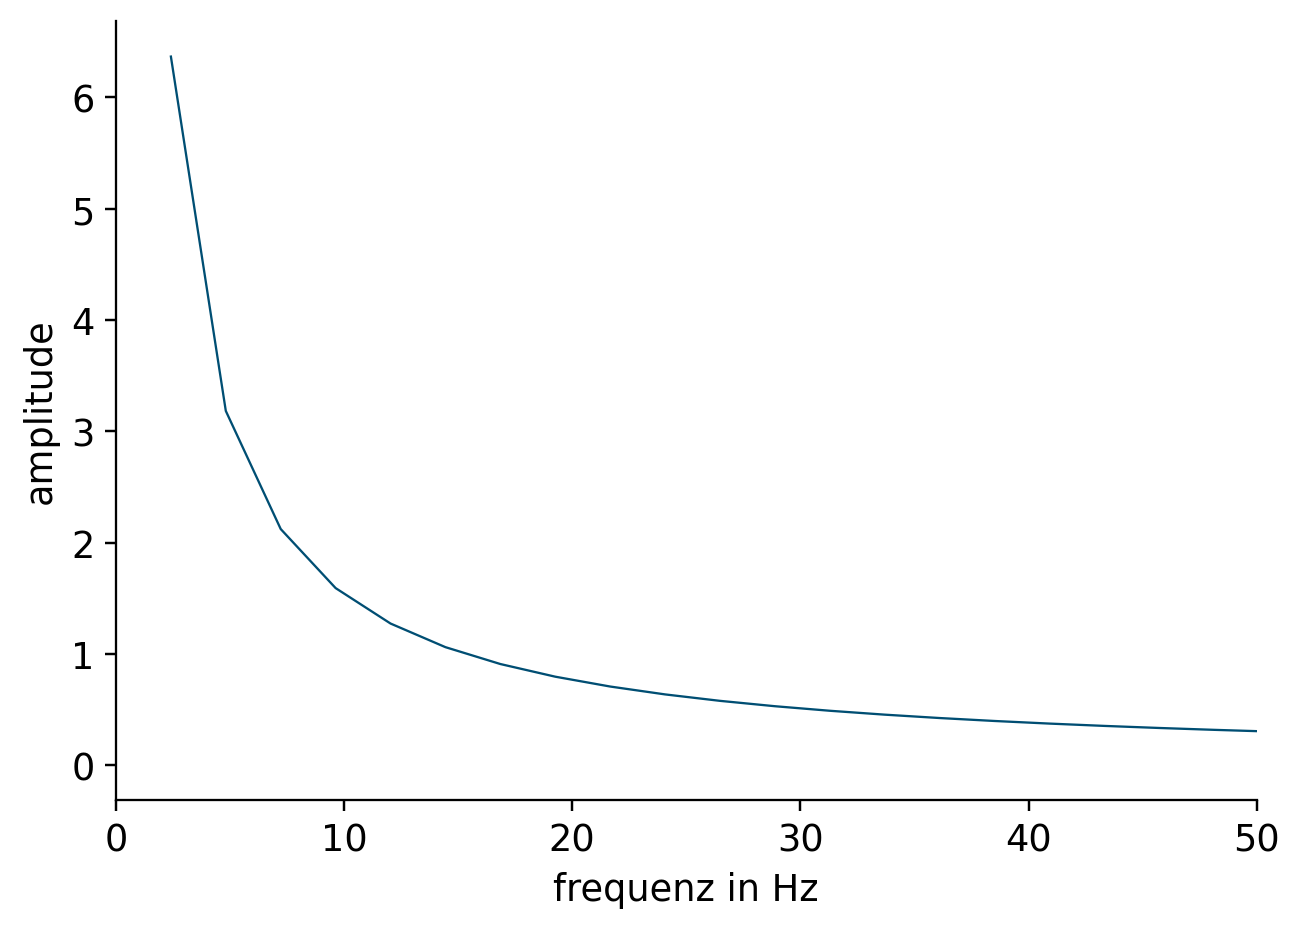

In [39]:
# -------------------------------------------------------------------------------------------#5-start
# TODO: Write my_fft() (in m_postprocessing) and plot results.
#[frequenz,amplitude]=my_fft(abs_acc,vec_time)
[frequenz,amplitude]=my_fft(interpolation_points,interpolated_values)

plt.plot(frequenz,amplitude)
plt.xlabel("frequenz in Hz")
plt.ylabel("amplitude")
plt.xlim(0,100)
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -

# Zweiter Versuch
Hier werten Sie den zweiten Gegenstand aus.

##  Versuchsaufbau und -durchführung

Beachten Sie, dass Sie den Code zum Auslesen des Beschleunigungssensor ausschließlich mit dem Raspberry Pi ausführen können.

- Bild von Aufbau des Haushaltsgegenstands:

<img src="20240109_142006.jpg" width="500">

- Beschreibung des Aufbaus:DerPi wurde mitSensor auf der Waschmaschine platziert und mit klebestreifen befestigt
- Vorgangsbeschreibung:Die Maschine wurde angemacht und ihre Schwingung gemessen

## Versuchsauswertung

Führen Sie die obige Auswertung für den zweiten Gegenstand durch. Sie brauchen dafür nichts neu zu implementieren.

#### 1a. Einlesen der Mess- und Metadaten

In [40]:
"""Parameter definition"""
# -------------------------------------------------------------------------------------------#1-start
# TODO: Adjust the parameters to your needs. Please use relative paths!
# - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - -
path_measurement_folder = "measurement_data/data_20240109_163642_OleQuiring_washingmachine" # replace None by the relative path to the first object's folder
h5_file_name = "data_20240109_163642_OleQuiring_washingmachine.h5" # replace None by the filename of the hdf5-file
# ---------------------------------------------------------------------------------------------#1-end

#### 1b. Auslesen der Beschleunigungen und der Zeit in numpy-arrays

In [41]:
file_path=path_measurement_folder+"/"+h5_file_name
sensorid= list(setup_json_dict)[2]
with h5py.File(file_path, 'r') as file:
    acc_x = np.array(file[sensorid]["acceleration_x"]["value"])
    acc_y  = np.array(file[sensorid]["acceleration_y"]["value"])
    acc_z = np.array(file[sensorid]["acceleration_z"]["value"])
    vec_time = np.array(file[sensorid]["timestamp"]["value"])

#### 2. Betrag der Beschleunigung berechnen


In [42]:
abs_acc=get_vec_accel(acc_x,acc_y,acc_z)

#### 3. Darstellung der Messdaten

Text(0, 0.5, 'absolute value of acceleration in m/s^2')

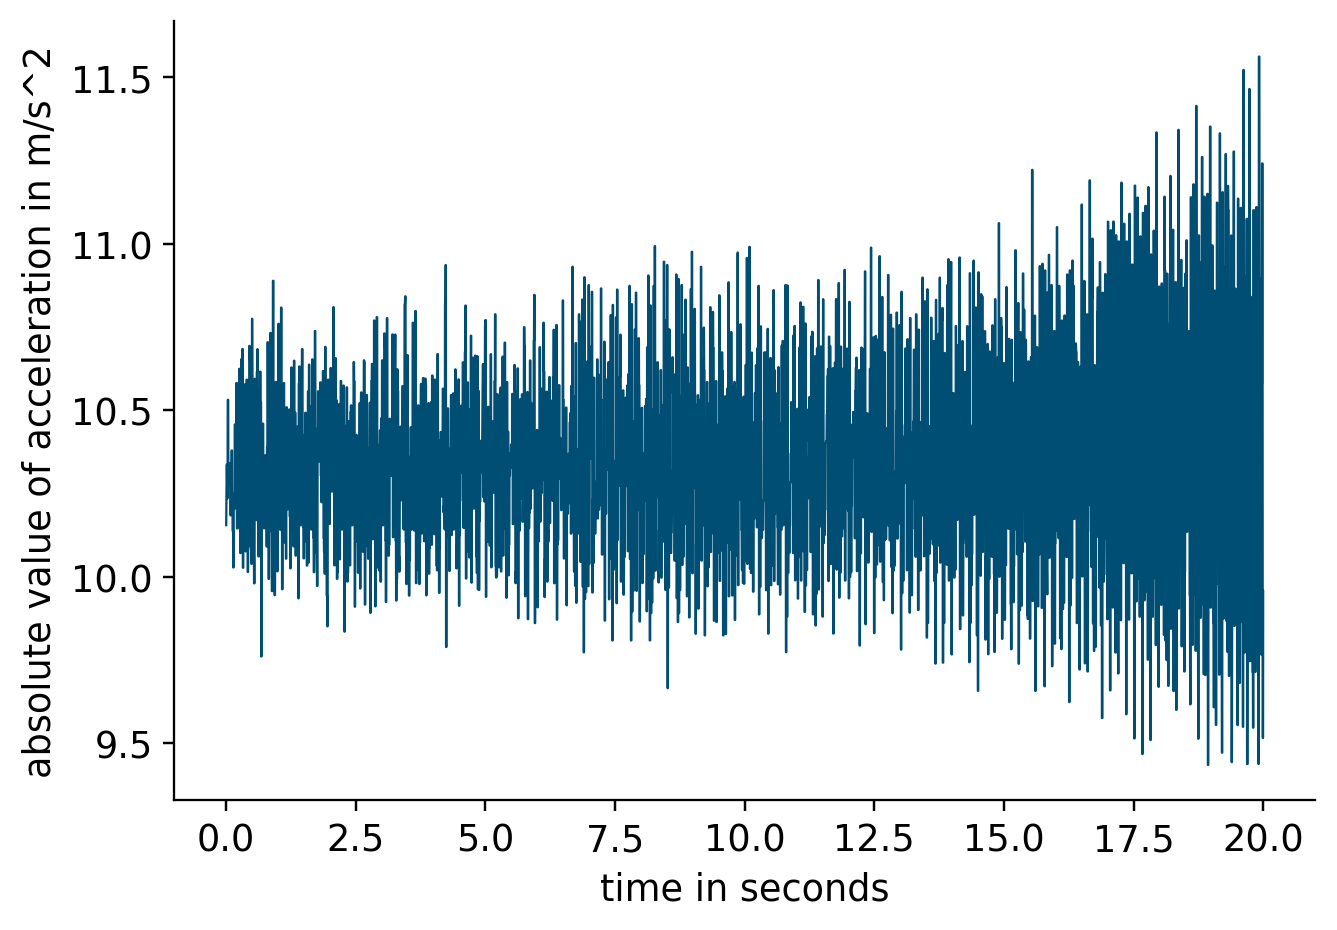

In [43]:
plt.plot(vec_time,abs_acc)
plt.xlabel("time in seconds")
plt.ylabel("absolute value of acceleration in m/s^2")

#### 4. Interpolation der Messwerte



In [44]:
# -------------------------------------------------------------------------------------------#4-start
# TODO: Write the function interpolation() (in m_postprocessing) to linearly interpolate the
# acceleration.
[interpolation_points,interpolated_values]=interpolation(vec_time,abs_acc)
print(interpolated_values)
print(interpolation_points)

[10.15544757 10.19657433 10.23770109 ...  9.51655404  9.51655404
  9.95807264]
[0.00000000e+00 2.35574214e-03 4.71148427e-03 ... 1.99931835e+01
 1.99955393e+01 1.99978950e+01]


#### 5 & 6. FFT durchführen und graphisch darstellen


[2.15047582e+04 2.14996922e+04 2.14946263e+04 ... 1.51977089e+01
 1.01318060e+01 5.06590298e+00]


(0.0, 100.0)

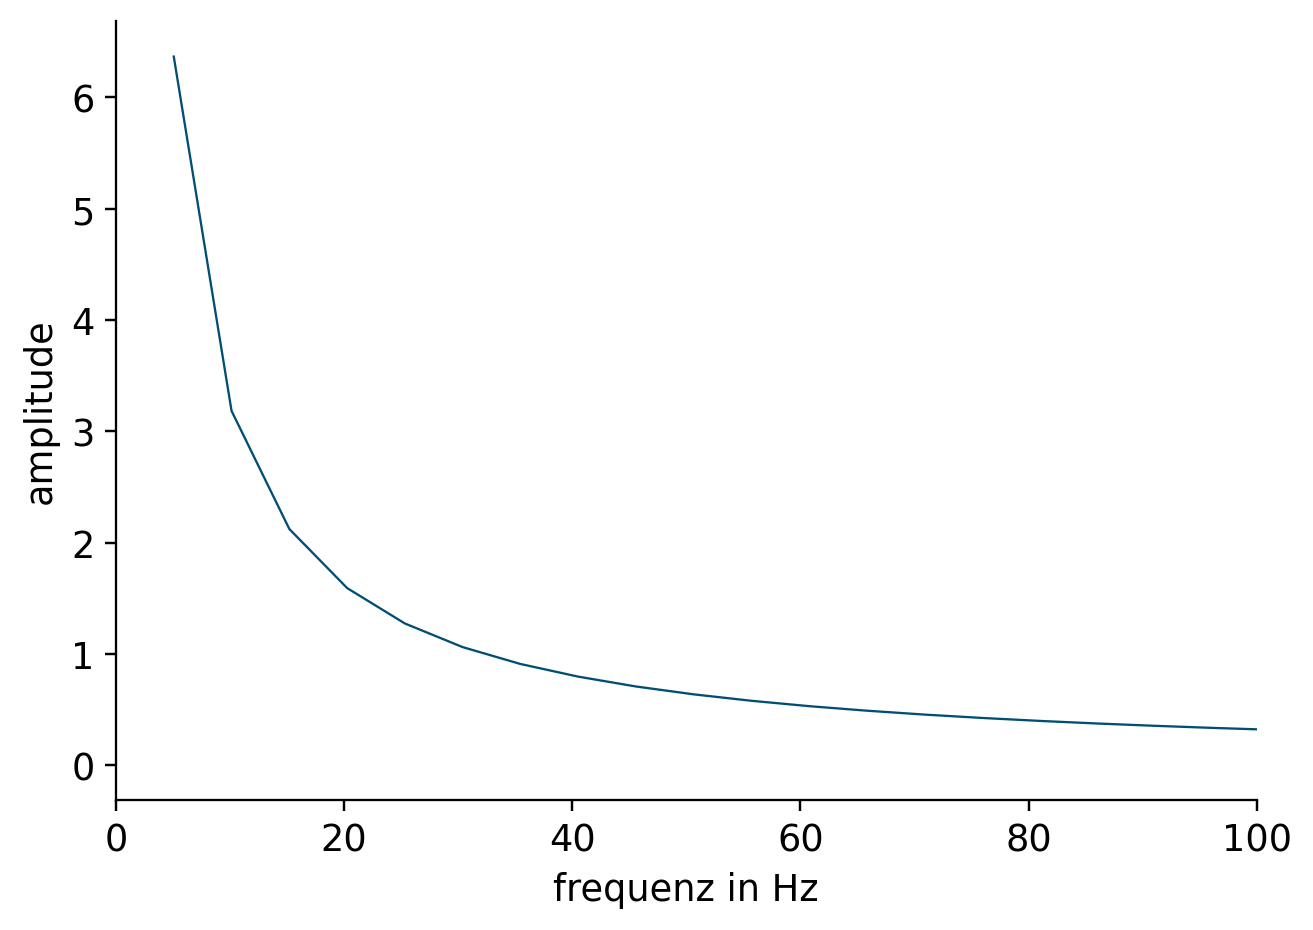

In [47]:
# -------------------------------------------------------------------------------------------#5-start
# TODO: Write my_fft() (in m_postprocessing) and plot results.
#[frequenz,amplitude]=my_fft(abs_acc,vec_time)
[frequenz,amplitude]=my_fft(interpolation_points,interpolated_values)
print(frequenz)
plt.plot(frequenz,amplitude)
plt.xlabel("frequenz in Hz")
plt.ylabel("amplitude")
plt.xlim(0,100)
# - - - - - - - - - - - - -

## Diskussion
Diskutieren Sie die Ergebnisse Ihrer Experimente aus wissenschaftlicher Sicht, gehen Sie dabei insbesondere auch auf die zu Beginn aufgestellte Forschungsfrage ein. Beispielsweise können Sie hier auf Einschränkungen der Aussagekraft der Ergebnisse eingehen.

Ich glaube leidee, dass mein Messsensor einen Fehler hatee,da die Messdaten bei der Auswertung leider keinen Sinn ergeben. Eventuell habe ich den Senor auch nicht gut genug befestigt bekommen um jede Schwingung gut zu messen, jedoch vibriert mein Handy nicht bei 5 Hz, weshalb ich leider das Experiment nicht so gut auswerten konnte. Allerdingskanne s bei der Waschmaschine schon zutreffen, dass die Frequenz so niedrig ist, weshalbdas Experiment nicht komplett fehlgeschlagen ist.

## Fazit
Ziehen Sie ein Fazit zum durchgeführten Versuch, gehen Sie dabei gerne auf Ihrer persönliche Meinung oder Ihre Lernziele ein.

Der Versuch war sehr spannend und ich konnte gelerntes auch mal in Realität anwenden. Nur denke ich dass es mit einem besserem Sensor besser funktioniert hätte. Trotzdem was es interessant mit Hardware zu arbeiten und die erforderlichen Daten selbst zu messen.